## Practical 3

**Aim**: Implements Multinomial Logistic Regression (Iris Dataset).


In [9]:
!pip install numpy scikit-learn pandas scipy==1.10.1 statsmodels

ERROR: Ignored the following versions that require a different python version: 1.10.0 Requires-Python <3.12,>=3.8; 1.10.0rc1 Requires-Python <3.12,>=3.8; 1.10.0rc2 Requires-Python <3.12,>=3.8; 1.10.1 Requires-Python <3.12,>=3.8; 1.6.2 Requires-Python >=3.7,<3.10; 1.6.3 Requires-Python >=3.7,<3.10; 1.7.0 Requires-Python >=3.7,<3.10; 1.7.1 Requires-Python >=3.7,<3.10; 1.7.2 Requires-Python >=3.7,<3.11; 1.7.3 Requires-Python >=3.7,<3.11; 1.8.0 Requires-Python >=3.8,<3.11; 1.8.0rc1 Requires-Python >=3.8,<3.11; 1.8.0rc2 Requires-Python >=3.8,<3.11; 1.8.0rc3 Requires-Python >=3.8,<3.11; 1.8.0rc4 Requires-Python >=3.8,<3.11; 1.8.1 Requires-Python >=3.8,<3.11; 1.9.0 Requires-Python >=3.8,<3.12; 1.9.0rc1 Requires-Python >=3.8,<3.12; 1.9.0rc2 Requires-Python >=3.8,<3.12; 1.9.0rc3 Requires-Python >=3.8,<3.12; 1.9.1 Requires-Python >=3.8,<3.12
ERROR: Could not find a version that satisfies the requirement scipy==1.10.1 (from versions: 0.8.0, 0.9.0, 0.10.0, 0.10.1, 0.11.0, 0.12.0, 0.12.1, 0.13.0, 0

d:\subhashish\msc-cookbook\Sem-2\ML\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1264: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
d:\subhashish\msc-cookbook\Sem-2\ML\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1264: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
d:\subhashish\msc-cookbook\Sem-2\ML\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1264: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
d:\subhashish\msc-cookbook\Sem-2\ML\.venv\Lib\site-packages\sklearn\linear_model\_log

Accuracy: 1.00
Error rate: 0.00
Cross-Validation Accuracy: 0.97 (+/- 0.10)

Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


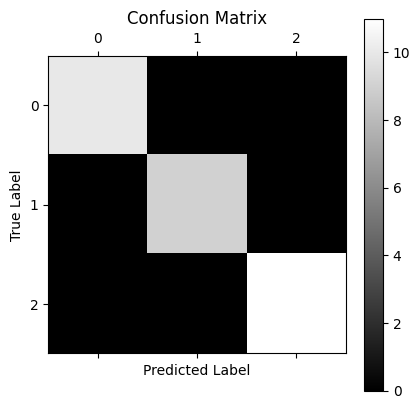


Predicted Probabilities:
 [[3.79689810e-03 8.27256284e-01 1.68946818e-01]
 [9.46826471e-01 5.31733295e-02 1.99615578e-07]
 [8.77983039e-09 1.55376783e-03 9.98446223e-01]
 [6.45430989e-03 7.92156630e-01 2.01389060e-01]
 [1.44797015e-03 7.74218420e-01 2.24333610e-01]
 [9.55789632e-01 4.42101918e-02 1.76612438e-07]
 [7.77234132e-02 9.07985388e-01 1.42911991e-02]
 [1.62249176e-04 1.55484429e-01 8.44353322e-01]
 [2.21306755e-03 7.62981425e-01 2.34805508e-01]
 [2.83643420e-02 9.45774028e-01 2.58616301e-02]
 [4.41748370e-04 2.43099926e-01 7.56458326e-01]
 [9.68245846e-01 3.17540756e-02 7.80357098e-08]
 [9.72953124e-01 2.70468424e-02 3.32903521e-08]
 [9.62040200e-01 3.79596893e-02 1.10857725e-07]
 [9.79278911e-01 2.07210242e-02 6.46695857e-08]
 [4.56298685e-03 7.12455809e-01 2.82981204e-01]
 [7.26039927e-06 2.41851486e-02 9.75807591e-01]
 [2.73519473e-02 9.47707486e-01 2.49405666e-02]
 [8.25015848e-03 8.31230547e-01 1.60519295e-01]
 [1.42579408e-05 3.59274345e-02 9.64058308e-01]
 [9.64308215e

d:\subhashish\msc-cookbook\Sem-2\ML\.venv\Lib\site-packages\statsmodels\discrete\discrete_model.py:3027: RuntimeWarning: overflow encountered in exp
  eXB = np.column_stack((np.ones(len(X)), np.exp(X)))
d:\subhashish\msc-cookbook\Sem-2\ML\.venv\Lib\site-packages\statsmodels\discrete\discrete_model.py:3028: RuntimeWarning: invalid value encountered in divide
  return eXB/eXB.sum(1)[:,None]


In [1]:
# Logistic Regression with Iris Dataset

# Step 1: Import Necessary Libraries
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import preprocessing
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import statsmodels.api as sm  # For detailed statistical summary
from sklearn import datasets

# Step 2: Load the Iris Dataset
iris = datasets.load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = pd.Series(iris.target, name='species')

# Step 3: Split the Data (80% training, 20% testing)
trainX, testX, trainY, testY = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Initialize and Train the Logistic Regression Model
log_reg = LogisticRegression(solver='newton-cg', multi_class='multinomial', max_iter=200)
log_reg.fit(trainX, trainY)

# Step 5: Make Predictions
y_pred = log_reg.predict(testX)

# Step 6: Evaluate the Model
print('Accuracy: {:.2f}'.format(accuracy_score(testY, y_pred)))
print('Error rate: {:.2f}'.format(1 - accuracy_score(testY, y_pred)))

# Step 7: Cross-Validation Scores
clf = LogisticRegression(solver='newton-cg', multi_class='multinomial', max_iter=200)
scores = cross_val_score(clf, trainX, trainY, cv=5)
print("Cross-Validation Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

# Step 8: Confusion Matrix
conf_matrix = confusion_matrix(testY, y_pred)
print("\nConfusion Matrix:\n", conf_matrix)

# Visualize the Confusion Matrix
plt.matshow(conf_matrix, cmap=plt.cm.gray)
plt.title('Confusion Matrix')
plt.colorbar()
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# Step 9: Predicted Class Probabilities
probability = log_reg.predict_proba(testX)
print("\nPredicted Probabilities:\n", probability)

# Convert to DataFrame for Better Visualization
df = pd.DataFrame(probability, columns=log_reg.classes_)

# Step 10: Verify Probabilities Sum to 1
df['sum'] = df.sum(axis=1)

# Step 11: Add Predicted and Actual Classes
df['predicted_class'] = y_pred
df['actual_class'] = testY.reset_index(drop=True)

# Step 12: Check if Predictions are Correct
df['correct_prediction?'] = df['predicted_class'] == df['actual_class']

# Step 13: Manually Calculate Accuracy
true_predictions = df['correct_prediction?'].sum()
total = df.shape[0]
print('Manual Calculated Accuracy is: {:.2f}%'.format((true_predictions / total) * 100))

# Step 14: Inspect Misclassified Instances
wrong_pred = df[df["correct_prediction?"] == False]
print("\nMisclassified Predictions:\n", wrong_pred)

# Step 15: Multinomial Logit Model with Statsmodels
# Add constant term for intercept
X_sm = sm.add_constant(X)
mnlogit_mod = sm.MNLogit(y, X_sm)
mnlogit_fit = mnlogit_mod.fit(maxiter=100)
print(mnlogit_fit.summary())